EDA & feature engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_house= pd.read_csv('DATA/kc_house_data.csv')

In [3]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df_house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df_house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


From the distplot below we could figure if we want to exclude outliers

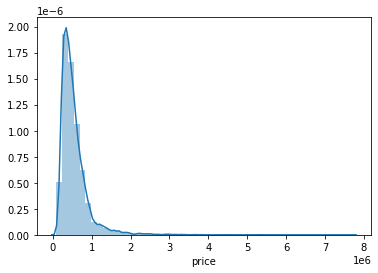

In [6]:
sns.distplot(df_house ['price'])

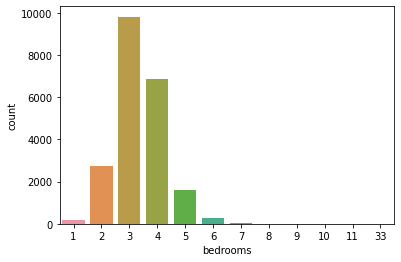

In [7]:
sns.countplot(df_house['bedrooms'])

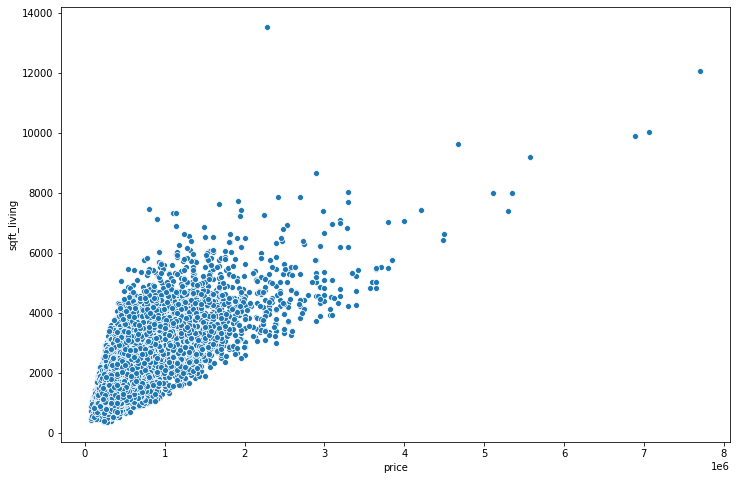

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df_house)

In [9]:
df_house.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [10]:
df_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
df_house.sort_values('price',ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


Sample out top 10% of df and creating map with scatterplots only

In [12]:
len(df_house)

21597

In [13]:
new_df_house= df_house.sort_values('price',ascending= False).iloc[216:]

In [14]:
len(new_df_house)

21381

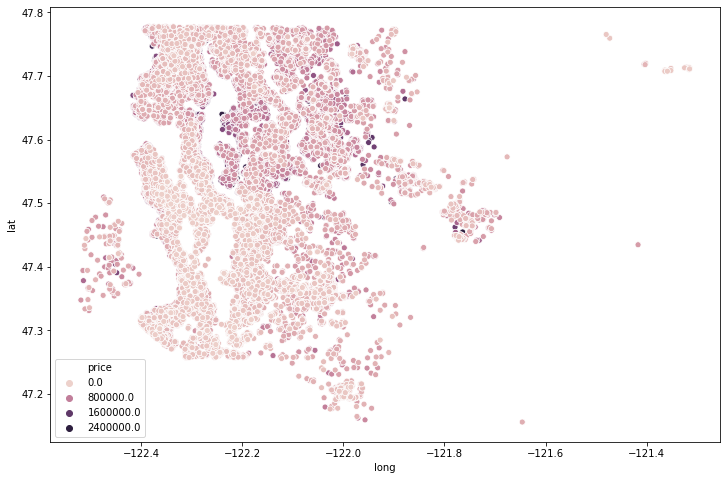

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=new_df_house,hue='price')


Using quick boxplot to understand price distribution based on waterfront or not which is categorical

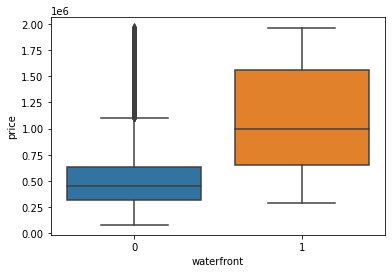

In [16]:
sns.boxplot(x='waterfront',y='price',data=new_df_house)

Feature Engineering Section

In [17]:
new_df_house= new_df_house.drop(columns='id',axis=1)

In [18]:
new_df_house['date']=pd.to_datetime(new_df_house['date']) #so that the yr/month etc can be easily extracted from this format

In [19]:
new_df_house['month']=new_df_house['date'].apply(lambda date: date.month)

In [20]:
new_df_house['year']=new_df_house['date'].apply(lambda date: date.year)

In [21]:
new_df_house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
6329,2014-06-02,1970000.0,4,3.50,4370,8510,2.0,0,1,3,...,760,2003,0,98004,47.5876,-122.204,2960,10347,6,2014
12271,2014-10-15,1960000.0,5,4.50,6200,23373,3.0,0,1,4,...,1150,1988,0,98040,47.5632,-122.215,3700,14486,10,2014
9166,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,1,4,4,...,1390,1960,0,98040,47.5287,-122.220,3730,16560,2,2015
12565,2015-04-22,1960000.0,4,4.00,4430,31353,2.0,0,0,3,...,0,1998,0,98005,47.6422,-122.157,3900,35237,4,2015
1150,2015-04-21,1960000.0,4,2.75,3120,7898,1.0,1,4,4,...,1560,1963,0,98034,47.7165,-122.259,2630,13868,4,2015


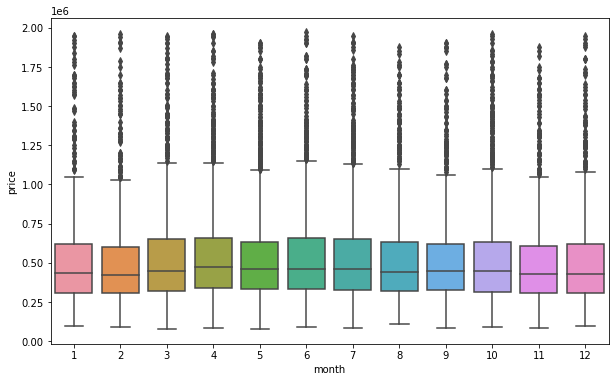

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=new_df_house)

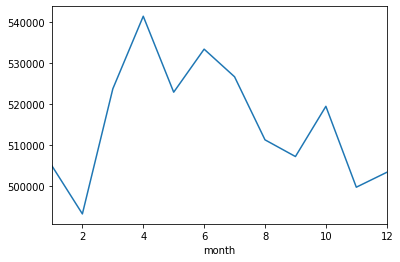

In [23]:
new_df_house.groupby('month').mean()['price'].plot()

In [24]:
new_df_house['zipcode'].value_counts() #70categories; frop this column for simplistic approach

98103    602
98038    589
98115    582
98052    573
98117    553
        ... 
98010    100
98102     99
98024     80
98148     57
98039     29
Name: zipcode, Length: 70, dtype: int64

In [41]:
new_df_house=new_df_house.drop('zipcode',axis=1)

In [42]:
new_df_house=new_df_house.drop('date',axis=1)

In [86]:
new_df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21381 entries, 6329 to 15279
Data columns (total 20 columns):
price            21381 non-null float64
bedrooms         21381 non-null int64
bathrooms        21381 non-null float64
sqft_living      21381 non-null int64
sqft_lot         21381 non-null int64
floors           21381 non-null float64
waterfront       21381 non-null int64
view             21381 non-null int64
condition        21381 non-null int64
grade            21381 non-null int64
sqft_above       21381 non-null int64
sqft_basement    21381 non-null int64
yr_built         21381 non-null int64
yr_renovated     21381 non-null int64
lat              21381 non-null float64
long             21381 non-null float64
sqft_living15    21381 non-null int64
sqft_lot15       21381 non-null int64
month            21381 non-null int64
year             21381 non-null int64
dtypes: float64(5), int64(15)
memory usage: 4.1 MB


In [87]:
X=new_df_house.drop('price',axis=1).values #as tensorflow can work with values but not with pd dfs & dropping price column which will be predicted
y=new_df_house['price'].values

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Remember to perform scaling only to the train set in order to avoid data leakage

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler=MinMaxScaler()

In [92]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) #only transform not fit to not assume prior info

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [94]:
X_train.shape #typically we base the no of neurons in model from size of actual data: 19 in this case

(14966, 19)

In [95]:
reg_model=Sequential()
reg_model.add (Dense(19, activation='relu'))
reg_model.add (Dense(19, activation='relu'))
reg_model.add(Dense(1))
reg_model.compile(optimizer='adam',loss='mse')

In [96]:
y_test.shape

(6415,)

In [98]:
reg_model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test)
              ,batch_size=128,epochs=400)  #smaller batch size longer training time but less chnaces of overfitting

Train on 14966 samples, validate on 6415 samples
Epoch 1/400
14966/14966 [==============================] - 0s 32us/sample - loss: 46650882678.3012 - val_loss: 47308125436.6878
Epoch 2/400
14966/14966 [==============================] - 0s 29us/sample - loss: 46441057755.5312 - val_loss: 47089116411.7300
Epoch 3/400
14966/14966 [==============================] - 0s 30us/sample - loss: 46230245980.3009 - val_loss: 46875104578.9231
Epoch 4/400
14966/14966 [==============================] - 0s 32us/sample - loss: 46019554521.7180 - val_loss: 46660353558.9063
Epoch 5/400
14966/14966 [==============================] - 0s 30us/sample - loss: 45809894304.0727 - val_loss: 46444152888.5076
Epoch 6/400
14966/14966 [==============================] - 0s 32us/sample - loss: 45598174379.7386 - val_loss: 46234198728.2507
Epoch 7/400
14966/14966 [==============================] - 0s 32us/sample - loss: 45387444622.4883 - val_loss: 46019180907.6277
Epoch 8/400
14966/14966 [==============================

14966/14966 [==============================] - 0s 32us/sample - loss: 34482882073.6582 - val_loss: 35029158427.5355
Epoch 65/400
14966/14966 [==============================] - 0s 28us/sample - loss: 34329073440.9451 - val_loss: 34878876358.0159
Epoch 66/400
14966/14966 [==============================] - 0s 29us/sample - loss: 34175439065.3075 - val_loss: 34720131133.9348
Epoch 67/400
14966/14966 [==============================] - 0s 32us/sample - loss: 34022319002.8726 - val_loss: 34566694415.5635
Epoch 68/400
14966/14966 [==============================] - 0s 29us/sample - loss: 33870868820.4667 - val_loss: 34416982941.1916
Epoch 69/400
14966/14966 [==============================] - 0s 30us/sample - loss: 33724309297.3663 - val_loss: 34271954693.3874
Epoch 70/400
14966/14966 [==============================] - 0s 28us/sample - loss: 33576438830.9373 - val_loss: 34128393640.7645
Epoch 71/400
14966/14966 [==============================] - 0s 31us/sample - loss: 33428987789.3251 - val_loss

14966/14966 [==============================] - 1s 42us/sample - loss: 28037263078.6497 - val_loss: 28685967233.2571
Epoch 128/400
14966/14966 [==============================] - 0s 28us/sample - loss: 27981039915.1399 - val_loss: 28627675523.2524
Epoch 129/400
14966/14966 [==============================] - 0s 30us/sample - loss: 27926457092.8922 - val_loss: 28576243968.3592
Epoch 130/400
14966/14966 [==============================] - 0s 31us/sample - loss: 27873121385.7800 - val_loss: 28523279787.9570
Epoch 131/400
14966/14966 [==============================] - 0s 30us/sample - loss: 27821515202.4888 - val_loss: 28470065346.7436
Epoch 132/400
14966/14966 [==============================] - 0s 32us/sample - loss: 27767289151.5296 - val_loss: 28417642371.8111
Epoch 133/400
14966/14966 [==============================] - 0s 30us/sample - loss: 27717558631.3511 - val_loss: 28366602586.3882
Epoch 134/400
14966/14966 [==============================] - 1s 37us/sample - loss: 27666723842.8737 - v

14966/14966 [==============================] - 0s 31us/sample - loss: 25869826509.7100 - val_loss: 26495134289.4890
Epoch 191/400
14966/14966 [==============================] - 1s 36us/sample - loss: 25850453101.4748 - val_loss: 26474872049.8332
Epoch 192/400
14966/14966 [==============================] - 1s 34us/sample - loss: 25836042494.5289 - val_loss: 26453832964.0306
Epoch 193/400
14966/14966 [==============================] - 0s 31us/sample - loss: 25810879091.2907 - val_loss: 26438409659.6003
Epoch 194/400
14966/14966 [==============================] - 0s 29us/sample - loss: 25793872038.9491 - val_loss: 26418765538.2697
Epoch 195/400
14966/14966 [==============================] - 0s 32us/sample - loss: 25774836844.2432 - val_loss: 26396092136.0162
Epoch 196/400
14966/14966 [==============================] - 1s 34us/sample - loss: 25756594936.0289 - val_loss: 26377407259.7350
Epoch 197/400
14966/14966 [==============================] - 0s 28us/sample - loss: 25737969414.1237 - v

14966/14966 [==============================] - 0s 30us/sample - loss: 25026207448.4180 - val_loss: 25625081548.0817
Epoch 254/400
14966/14966 [==============================] - 0s 31us/sample - loss: 25017235322.4407 - val_loss: 25619522447.1445
Epoch 255/400
14966/14966 [==============================] - 0s 33us/sample - loss: 25009419023.1554 - val_loss: 25609988196.0854
Epoch 256/400
14966/14966 [==============================] - 0s 32us/sample - loss: 25000493967.1041 - val_loss: 25601035449.9641
Epoch 257/400
14966/14966 [==============================] - 0s 30us/sample - loss: 24993179660.3159 - val_loss: 25594926418.0876
Epoch 258/400
14966/14966 [==============================] - 0s 28us/sample - loss: 24984660924.5361 - val_loss: 25580423625.0089
Epoch 259/400
14966/14966 [==============================] - 0s 31us/sample - loss: 24974468751.7541 - val_loss: 25571818947.2624
Epoch 260/400
14966/14966 [==============================] - 0s 30us/sample - loss: 24966975479.2420 - v

Epoch 316/400
14966/14966 [==============================] - 0s 30us/sample - loss: 24597386450.0548 - val_loss: 25187738659.2773
Epoch 317/400
14966/14966 [==============================] - 0s 29us/sample - loss: 24587255431.5435 - val_loss: 25185070932.7214
Epoch 318/400
14966/14966 [==============================] - 0s 31us/sample - loss: 24583172611.9000 - val_loss: 25177966109.1317
Epoch 319/400
14966/14966 [==============================] - 0s 30us/sample - loss: 24576844246.7417 - val_loss: 25175371942.9687
Epoch 320/400
14966/14966 [==============================] - 0s 31us/sample - loss: 24571255252.0048 - val_loss: 25169669493.2053
Epoch 321/400
14966/14966 [==============================] - 0s 32us/sample - loss: 24565951115.9225 - val_loss: 25165036026.4929
Epoch 322/400
14966/14966 [==============================] - 0s 30us/sample - loss: 24560901785.1963 - val_loss: 25158014743.4251
Epoch 323/400
14966/14966 [==============================] - 0s 30us/sample - loss: 245559

14966/14966 [==============================] - 0s 32us/sample - loss: 24296663439.5831 - val_loss: 24905558620.5032
Epoch 380/400
14966/14966 [==============================] - 0s 33us/sample - loss: 24292755070.6487 - val_loss: 24899893727.1969
Epoch 381/400
14966/14966 [==============================] - 1s 37us/sample - loss: 24289270627.8616 - val_loss: 24896888019.6639
Epoch 382/400
14966/14966 [==============================] - 0s 33us/sample - loss: 24284786678.9683 - val_loss: 24896842479.5186
Epoch 383/400
14966/14966 [==============================] - 0s 32us/sample - loss: 24281529636.7083 - val_loss: 24888596393.6424
Epoch 384/400
14966/14966 [==============================] - 0s 28us/sample - loss: 24277774216.6725 - val_loss: 24887106092.9347
Epoch 385/400
14966/14966 [==============================] - 0s 28us/sample - loss: 24272992511.8974 - val_loss: 24881272459.2736
Epoch 386/400
14966/14966 [==============================] - 0s 32us/sample - loss: 24272120745.9254 - v

In [104]:
losses=pd.DataFrame(reg_model.history.history)

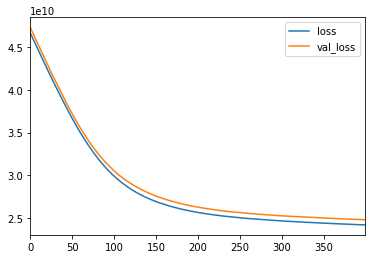

In [105]:
losses.plot()

Since in above diagram, both lines are decreasing, we can say if we continue training losses will decrease; if the validation loss starts increasing but not the training, that indicates overfitting.
Evaluation on test data:

In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [107]:
predictions=reg_model.predict(X_test)

In [109]:
np.sqrt(mean_squared_error(y_test,predictions)) #took sqrt to interpret better

157560.94649680168

In [110]:
mean_absolute_error(y_test,predictions) #to understand the context of this value for the price column

109273.72466851202

In [111]:
new_df_house['price'].describe() #our erroris 20% of mean which is not great

count    2.138100e+04
mean     5.183675e+05
std      2.849428e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      1.970000e+06
Name: price, dtype: float64

In [112]:
explained_variance_score(y_test,predictions)

0.6986847232482114

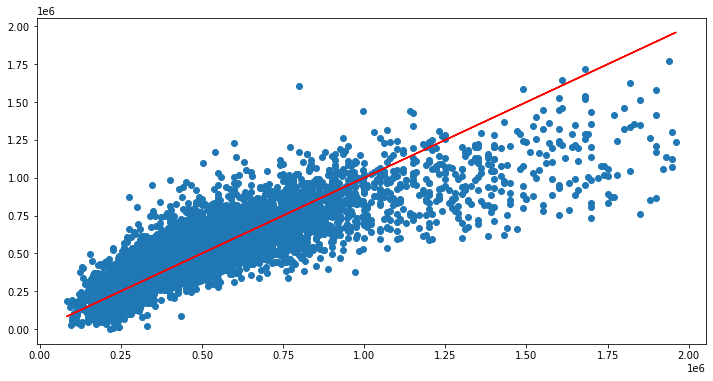

In [116]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

Classification of Cancer Dataset (to show overfitting and avoid using dropouts and early stopping)

In [120]:
dfC=pd.read_csv('DATA/cancer_classification.csv')

In [123]:
dfC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [124]:
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

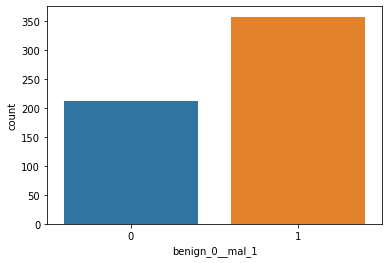

In [125]:
sns.countplot(x='benign_0__mal_1',data=dfC)

In [129]:
dfC.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

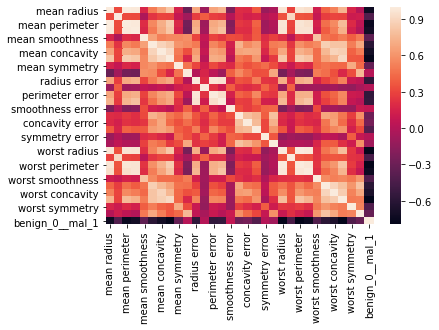

In [130]:
sns.heatmap(dfC.corr())

In [131]:
#traintest split
X=dfC.drop('benign_0__mal_1',axis=1).values
y=dfC['benign_0__mal_1'].values

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=101)

In [135]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
scaler=MinMaxScaler() #create instance

In [137]:
X_train=scaler.fit_transform(X_train)

In [138]:
X_test=scaler.transform(X_test)

In [140]:
from tensorflow.keras.models import Sequential

In [142]:
from tensorflow.keras.layers import Dense,Dropout

In [143]:
X_train.shape

(426, 30)

In [147]:
modelC=Sequential()
modelC.add(Dense(30,activation='relu'))
modelC.add(Dense(15,activation='relu'))
modelC.add(Dense(1,activation='sigmoid'))   #sigmoid for binary classi

In [148]:
modelC.compile(optimizer='adam',loss='binary_crossentropy')

In [149]:
modelC.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6677 - val_loss: 0.6483
Epoch 2/600
426/426 [==============================] - 0s 141us/sample - loss: 0.6166 - val_loss: 0.6025
Epoch 3/600
426/426 [==============================] - 0s 144us/sample - loss: 0.5655 - val_loss: 0.5494
Epoch 4/600
426/426 [==============================] - 0s 136us/sample - loss: 0.5079 - val_loss: 0.4887
Epoch 5/600
426/426 [==============================] - 0s 135us/sample - loss: 0.4480 - val_loss: 0.4285
Epoch 6/600
426/426 [==============================] - 0s 131us/sample - loss: 0.3924 - val_loss: 0.3711
Epoch 7/600
426/426 [==============================] - 0s 147us/sample - loss: 0.3454 - val_loss: 0.3258
Epoch 8/600
426/426 [==============================] - 0s 190us/sample - loss: 0.3065 - val_loss: 0.2901
Epoch 9/600
426/426 [==============================] - 0s 144us/sample - loss: 0.2750 - val_loss: 0.2594
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0535 - val_loss: 0.1178
Epoch 79/600
426/426 [==============================] - 0s 209us/sample - loss: 0.0576 - val_loss: 0.1094
Epoch 80/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0630 - val_loss: 0.1316
Epoch 81/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0599 - val_loss: 0.1121
Epoch 82/600
426/426 [==============================] - 0s 170us/sample - loss: 0.0572 - val_loss: 0.1238
Epoch 83/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0549 - val_loss: 0.1123
Epoch 84/600
426/426 [==============================] - 0s 184us/sample - loss: 0.0560 - val_loss: 0.1279
Epoch 85/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0548 - val_loss: 0.1130
Epoch 86/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0514 - val_loss: 0.1146
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0416 - val_loss: 0.1308
Epoch 156/600
426/426 [==============================] - 0s 175us/sample - loss: 0.0422 - val_loss: 0.1236
Epoch 157/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0402 - val_loss: 0.1318
Epoch 158/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0458 - val_loss: 0.1200
Epoch 159/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0451 - val_loss: 0.1384
Epoch 160/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0419 - val_loss: 0.1305
Epoch 161/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0406 - val_loss: 0.1273
Epoch 162/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0407 - val_loss: 0.1331
Epoch 163/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0400 - val_loss: 0.1233
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 172us/sample - loss: 0.0310 - val_loss: 0.1462
Epoch 232/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0308 - val_loss: 0.1360
Epoch 233/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0335 - val_loss: 0.1363
Epoch 234/600
426/426 [==============================] - 0s 215us/sample - loss: 0.0328 - val_loss: 0.1579
Epoch 235/600
426/426 [==============================] - 0s 247us/sample - loss: 0.0334 - val_loss: 0.1329
Epoch 236/600
426/426 [==============================] - 0s 255us/sample - loss: 0.0307 - val_loss: 0.1442
Epoch 237/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0304 - val_loss: 0.1414
Epoch 238/600
426/426 [==============================] - 0s 180us/sample - loss: 0.0302 - val_loss: 0.1413
Epoch 239/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0296 - val_loss: 0.1366
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 135us/sample - loss: 0.0242 - val_loss: 0.1648
Epoch 308/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0276 - val_loss: 0.1688
Epoch 309/600
426/426 [==============================] - 0s 185us/sample - loss: 0.0239 - val_loss: 0.1629
Epoch 310/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0230 - val_loss: 0.1781
Epoch 311/600
426/426 [==============================] - 0s 225us/sample - loss: 0.0277 - val_loss: 0.1529
Epoch 312/600
426/426 [==============================] - 0s 175us/sample - loss: 0.0251 - val_loss: 0.1569
Epoch 313/600
426/426 [==============================] - 0s 207us/sample - loss: 0.0238 - val_loss: 0.1661
Epoch 314/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0221 - val_loss: 0.1547
Epoch 315/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0242 - val_loss: 0.1587
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 149us/sample - loss: 0.0168 - val_loss: 0.2059
Epoch 384/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0168 - val_loss: 0.1817
Epoch 385/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0193 - val_loss: 0.2003
Epoch 386/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0163 - val_loss: 0.1883
Epoch 387/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0183 - val_loss: 0.2013
Epoch 388/600
426/426 [==============================] - 0s 212us/sample - loss: 0.0196 - val_loss: 0.1769
Epoch 389/600
426/426 [==============================] - 0s 186us/sample - loss: 0.0197 - val_loss: 0.1984
Epoch 390/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0162 - val_loss: 0.2000
Epoch 391/600
426/426 [==============================] - 0s 208us/sample - loss: 0.0157 - val_loss: 0.1829
Epoch 392/600
426/426 [============================

Epoch 460/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0106 - val_loss: 0.2239
Epoch 461/600
426/426 [==============================] - 0s 207us/sample - loss: 0.0107 - val_loss: 0.2129
Epoch 462/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0127 - val_loss: 0.2432
Epoch 463/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0114 - val_loss: 0.2246
Epoch 464/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0115 - val_loss: 0.2037
Epoch 465/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0134 - val_loss: 0.2334
Epoch 466/600
426/426 [==============================] - 0s 190us/sample - loss: 0.0133 - val_loss: 0.2057
Epoch 467/600
426/426 [==============================] - 0s 186us/sample - loss: 0.0132 - val_loss: 0.2713
Epoch 468/600
426/426 [==============================] - 0s 196us/sample - loss: 0.0147 - val_loss: 0.2059
Epoch 469/600
426/426 [==============

426/426 [==============================] - 0s 166us/sample - loss: 0.0075 - val_loss: 0.2489
Epoch 537/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0064 - val_loss: 0.2743
Epoch 538/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0069 - val_loss: 0.2804
Epoch 539/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0068 - val_loss: 0.2554
Epoch 540/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0066 - val_loss: 0.2844
Epoch 541/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0068 - val_loss: 0.2510
Epoch 542/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0059 - val_loss: 0.2698
Epoch 543/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0058 - val_loss: 0.2574
Epoch 544/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0067 - val_loss: 0.3014
Epoch 545/600
426/426 [============================

In [152]:
losses=pd.DataFrame(modelC.history.history)

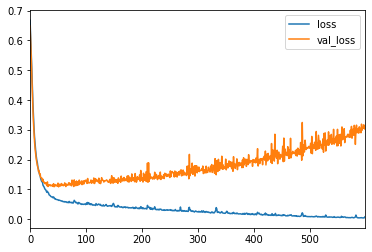

In [153]:
losses.plot()  #perfect example of overfitting

using Early Stopping by callbacks

In [154]:
from tensorflow.keras.callbacks import EarlyStopping

In [155]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [156]:
modelC=Sequential()
modelC.add(Dense(30,activation='relu'))
modelC.add(Dense(15,activation='relu'))
modelC.add(Dense(1,activation='sigmoid')) 
modelC.compile(optimizer='adam',loss='binary_crossentropy')

In [157]:
early_stop= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [159]:
modelC.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6746 - val_loss: 0.6510
Epoch 2/600
426/426 [==============================] - 0s 110us/sample - loss: 0.6307 - val_loss: 0.6093
Epoch 3/600
426/426 [==============================] - 0s 114us/sample - loss: 0.5891 - val_loss: 0.5646
Epoch 4/600
426/426 [==============================] - 0s 161us/sample - loss: 0.5435 - val_loss: 0.5129
Epoch 5/600
426/426 [==============================] - 0s 170us/sample - loss: 0.4909 - val_loss: 0.4577
Epoch 6/600
426/426 [==============================] - 0s 168us/sample - loss: 0.4392 - val_loss: 0.4050
Epoch 7/600
426/426 [==============================] - 0s 166us/sample - loss: 0.3899 - val_loss: 0.3568
Epoch 8/600
426/426 [==============================] - 0s 122us/sample - loss: 0.3455 - val_loss: 0.3150
Epoch 9/600
426/426 [==============================] - 0s 129us/sample - loss: 0.3082 - val_loss: 0.2799
Epoch 10/60

In [160]:
early_stop_loss=pd.DataFrame(modelC.history.history)

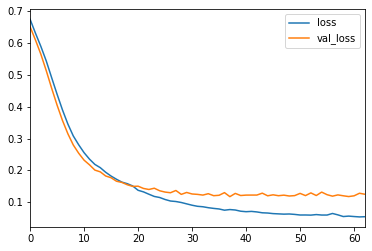

In [161]:
early_stop_loss.plot()

Alternate method: Adding dropout layers to turn off percentage of neurons randomly combined with early stopping

In [162]:
from tensorflow.keras.layers import Dropout  #with 50% dropout of neurons after each step to reduce co-dependency & increase perf

In [164]:
modelC=Sequential()
modelC.add(Dense(30,activation='relu'))
modelC.add(Dropout(0.5))
modelC.add(Dense(15,activation='relu'))
modelC.add(Dropout(0.5))
modelC.add(Dense(1,activation='sigmoid')) 
modelC.compile(optimizer='adam',loss='binary_crossentropy')
#note: sigmoid for non-exclusive classes and softmax for exclusive classes in case of multi class classification problem
#also in case of exclusive, the sum of probabilities across diff classes will be 1 and the softmax chooses the max class, 
#not the case with non exclusive where sigmoid allots 0/1 to every class independently

In [165]:
modelC.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6920 - val_loss: 0.6705
Epoch 2/600
426/426 [==============================] - 0s 126us/sample - loss: 0.6910 - val_loss: 0.6517
Epoch 3/600
426/426 [==============================] - 0s 131us/sample - loss: 0.6530 - val_loss: 0.6352
Epoch 4/600
426/426 [==============================] - 0s 149us/sample - loss: 0.6369 - val_loss: 0.6145
Epoch 5/600
426/426 [==============================] - 0s 160us/sample - loss: 0.6176 - val_loss: 0.5934
Epoch 6/600
426/426 [==============================] - 0s 154us/sample - loss: 0.6059 - val_loss: 0.5718
Epoch 7/600
426/426 [==============================] - 0s 160us/sample - loss: 0.5772 - val_loss: 0.5498
Epoch 8/600
426/426 [==============================] - 0s 160us/sample - loss: 0.5473 - val_loss: 0.5176
Epoch 9/600
426/426 [==============================] - 0s 174us/sample - loss: 0.5075 - val_loss: 0.4816
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 172us/sample - loss: 0.1292 - val_loss: 0.1073
Epoch 79/600
426/426 [==============================] - 0s 158us/sample - loss: 0.1077 - val_loss: 0.0991
Epoch 80/600
426/426 [==============================] - 0s 201us/sample - loss: 0.1243 - val_loss: 0.1001
Epoch 81/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0980 - val_loss: 0.1090
Epoch 82/600
426/426 [==============================] - 0s 124us/sample - loss: 0.1169 - val_loss: 0.0973
Epoch 83/600
426/426 [==============================] - 0s 125us/sample - loss: 0.1058 - val_loss: 0.1093
Epoch 84/600
426/426 [==============================] - 0s 188us/sample - loss: 0.1142 - val_loss: 0.1010
Epoch 85/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0962 - val_loss: 0.0954
Epoch 86/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0840 - val_loss: 0.1013
Epoch 87/600
426/426 [========================

In [166]:
combined_loss=pd.DataFrame(modelC.history.history)

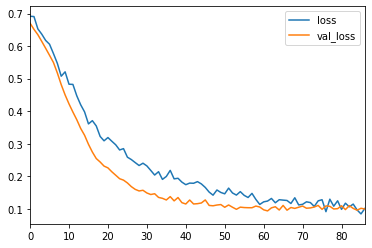

In [167]:
combined_loss.plot() # hence significantly increased perf

In [170]:
predictions=modelC.predict_classes(X_test)

In [169]:
from sklearn.metrics import classification_report,confusion_matrix

In [171]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [172]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
